# Interactive data analysis/exploration using the Jupyter notebook and numpy
 
## [@WillFurnass](https://twitter.com/willfurnass)

### Python Sheffield User's Group

### 24th February 2015

# Overview

- Interactive programming?
- Jupyter Notebook: (more than?) a better REPL
- fast numerical arrays using `numpy`

Tabular data with `pandas` - next time?

## What do we want to be able to do?

 * Quickly import from CSV / XLSX / DB (/clipboard?)
 * Clean/pre-process/validate data
 * Resample
 * Aggregate
 * Map/filter
 * Relational operations
 * Farm out tasks to R/Julia/Cython/extension modules
 * Visualise
 * Create narrative/audit trail (inc. markup, equations, dynamic figs)
 * Export analysis

# Part 1: Interactive Python work:

Could use
- script + debugger
   - no audit trace
   - limited as to what can define
- traditional REPL 
   - limited in what can display

But what if want to see intermediary/final results that cannot easily be appreciated as text? e.g.

- images (e.g. heatmaps)
- graphs
- geospatial data
- mathematical expressions
- tables

```
  ^
  |       x           
y |   x x        YUK  ('~')
  | x
  |________>
       x
```

Why not use browser as a REPL?  

Browsers can present bitmap & vector images, tables, maths (using MathJax), video, audio...

# Ipython Notebook (now Project Jupyter)

Work interactively with Python (or R/Julia/Octave/JS/...) in the browser!

 - Each Notebook file consists of a list of cells.  
 - Each cell is 
    - code
    - Markdown/HTML (inc $LaTeX$) or 
    - raw (for conversion)
 - Cells can contain multiple lines
 - Cell only executed when done with editing (*c.f. console-based REPL*)
 - If last block in cell is expr, display repr of that 
 - Can run cells in any order

`Some LaTeX maths, rendered in a **Markdown** cell:`

`$y(x) = x^3 + \frac(x^2,3) - 6 \cdot x + 4$`

Some LaTeX maths, rendered in a **Markdown** cell:

$y(x) = x^3 + \frac{x^2}{3} - 6 \cdot x + 4$

In [1]:
import numpy as np
def f(a, b):
    return 20 - ((a**2 - (10 * np.cos(2 * np.pi * a))) +
                (b**2 - (10 * np.cos(2 * np.pi * b))))
f(3, 4)
f(5, 6)

-21.0

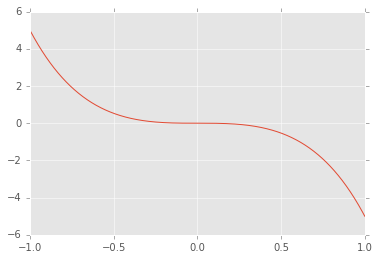

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

x = np.linspace(-1, 1, 1000)
y = -x**5 - 4 * x**3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)

# Jupyter Notebok repr methods

Special `_repr_*_` methods:

In [3]:
class Circle(object):
    def __init__(self, radius, color_str):
        if radius > 50:
            raise ValueError('Must have 0 < radius <= 50')
        else:
            self.radius = radius
        self.color = color_str
        
    def _repr_html_(self):
        return """<svg height="100" width="100">
                     <circle cx="50" cy="50" r="{}" fill="{}" />
                     Sorry, your browser does not support inline SVG.  
                  </svg>""".format(self.radius, self.color)

Circle(31.2, 'red')

In [4]:
from IPython.display import display 
display(Circle(15, 'blue'))
display(Circle(31.2, 'green'))


Many projects now including `_repr_html_` and `_repr_latex_` methods for Ipython notebook:

 * `sympy` for analytical maths
 * `pandas` for manipulating tabular data
 * `matplotlib`/`bokeh`/`seaborn` for plotting

# Grand vision

 * Demonstrate concepts/analysis using reproducible narratives
 * Validate the findings of others
 * Tutorials/lectures
 * Quick SA
 * Text, maths, code and figures all in one place. 
 * Share 
    * as `ipynb` file
    * via server (e.g. Nature)
    * via `nbviewer.ipython.org` as static HTML
    * document (as file) using `nbconvert` utility (generate HTML, PDF or LaTeX)
    * as presentation (`reveal.js`)

# Architecture

### Server
Kernel + tornado (async web server like Node.js)

### Client
browser + CodeMirror text editor + MathJax (typically from CDN)

### Comms
ZeroMQ over websockets 

## Other cool stuff

- `ipyparallel`
- cell magics: call out to other languages, create Python extension modules on the fly etc.
- shell access
- modal vim-like editing/movement!

# Part 2: Tools for interactive data manipulation

Much data in engineering/science/economics is array / tabular / matrix

- frequent, regular pressure measurements (array of float pressure (and timestamps?))
- river flow at different distances along a reach (array of float flows and float distances)
- discrete, irregular samples of concentration along an open channel
- data on all pipes managed by a water company (homogeneous)

How best to access/manipulate such data interactively?

 * Lists/tuples are slow
     * Data may be homogeneous but Python doesn't know that
     * Can't use pointer arithmetic: instead iterate over array of objects of arbitrary size 
 * Also, cannot force lists of lists to be rectangular without encapsulation

### Numpy arrays

 * Homogeneously typed arrays – fast creation and element access!
 * C-like arrays implemented using (compiled) Python extension modules
 * but with
     - metadata inc datatype and  size/shape
     - garbage collection!

In [5]:
import numpy as np
a = np.array([[0, 1], [1, 0]])
a

array([[0, 1],
       [1, 0]])

In [6]:
b = np.linspace(0.3, 8.9, 10)
b

array([ 0.3       ,  1.25555556,  2.21111111,  3.16666667,  4.12222222,
        5.07777778,  6.03333333,  6.98888889,  7.94444444,  8.9       ])

In [7]:
a.dtype, b.dtype

(dtype('int64'), dtype('float64'))

In [8]:
a.shape, b.shape

((2, 2), (10,))

### Array-level operations (in C) are much faster!

In [9]:
x_max = 10000
x1 = list(range(x_max))
x2 = np.arange(x_max)
%timeit [x + 1 for x in x1]
%timeit x2 + 1

1000 loops, best of 3: 746 µs per loop
The slowest run took 23.73 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.07 µs per loop


## Array-level operations

Note that many standard operators (arithmetic, comparison, element access, etc) allow for array/slice (view)-level operations.

Fast as implemented in C.

In [10]:
distances = np.linspace(0, 1774, 50)
distances.shape, distances.max()

((50,), 1774.0)

In [11]:
concentrations = np.random.normal(5, 3, len(distances))
concentrations.shape, concentrations.min()

((50,), 0.29912674162937236)

Ensure all concentrations are strictly positive:

In [12]:
concentrations[concentrations < 0] = 0

Find the median concentration over all but the first and last 100 units of distance:

In [13]:
np.median(concentrations[(distances > 100 ) & (distances <= distances[-1] - 100)])

6.1252944385858328

# Copies vs views

A word of warning:

 - Some slicing/indexing operations return views
    - modifying a view also changes the `base` array 
 - More complex slicing/indexing returns copies
 - See `numpy` docs for rules 

# Also in `numpy`

 * broadcasting: 
    * operate on arrays/scalars of different shapes if rules regarding number of rows/columns/elements satisfied 
 * ufuncs
    * functions where one or more arguments can be arrays
    * broadcasting used to determine how to combine arguments
    * vectorized wrapper for function that takes only scalar as arguments
 * read/write from/to csv/binary format
 * masked arrays (dealing with missing data)
 * interpolation
 * statistical sampling
 * linear algebra
 * interact from cython/numba

# Pandas - next time?

Thanks for listening